<a href="https://colab.research.google.com/github/StanleyLiangYork/PytorchCode/blob/main/Multi_Class_Neural_Networks_with_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch 
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
import torch.nn.functional as F
import matplotlib.pylab as plt
import numpy as np

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [2]:
# Define a function to plot accuracy and loss

def plot_accuracy_loss(training_results): 
    plt.subplot(2, 1, 1)
    plt.plot(training_results['training_loss'], 'r')
    plt.ylabel('loss')
    plt.title('training loss iterations')
    plt.subplot(2, 1, 2)
    plt.plot(training_results['validation_accuracy'])
    plt.ylabel('accuracy')
    plt.xlabel('epochs')   
    plt.show()

In [3]:
# Define a function to plot model parameters

def print_model_parameters(model):
    count = 0
    for ele in model.state_dict():
        count += 1
        if count % 2 != 0:
            print ("The following are the parameters for the layer ", count // 2 + 1)
        if ele.find("bias") != -1:
            print("The size of bias: ", model.state_dict()[ele].size())
        else:
            print("The size of weights: ", model.state_dict()[ele].size())

In [4]:
# Define a function to display data

def show_data(data_sample):
    plt.imshow(data_sample.numpy().reshape(28, 28), cmap='gray')
    plt.show()

In [5]:
# Define a Neural Network class

class Net(nn.Module):
    
    # Constructor
    def __init__(self, D_in, H, D_out):
        super(Net, self).__init__()
        self.linear1 = nn.Linear(D_in, H)
        self.linear2 = nn.Linear(H, D_out)

    # Prediction    
    def forward(self, x):
        x = torch.sigmoid(self.linear1(x))  
        x = self.linear2(x)
        return x

In [6]:

# Define a training function to train the model

def train(model, criterion, train_loader, validation_loader, optimizer, epochs=100):
    # i = 0
    useful_stuff = {'training_loss': [],'validation_accuracy': []}
    criterion = criterion.to(device)
    model = model.to(device)
    correct = torch.tensor([0], dtype=torch.int32, requires_grad=False)  
    for epoch in range(epochs):
      for x, y in train_loader: 
        x, y = x.to(device), y.to(device)
        optimizer.zero_grad()
        z = model(x.view(-1, 28 * 28))
        loss = criterion(z, y)
        loss.backward()
        optimizer.step()
        #loss for every iteration
        useful_stuff['training_loss'].append(loss.data.item())

        
      # validation
      for x, y in validation_loader:
        x, y = x.to(device), y.to(device) 
        z = model(x.view(-1, 28 * 28))
        _, label = torch.max(z, 1)
        correct += (label == y).sum().item()
      correct_cpu = correct.cpu()
      accuracy = 100 * (correct_cpu / len(validation_dataset))
      useful_stuff['validation_accuracy'].append(accuracy)

      if (epoch+1) % 10 == 0:
        epoch_loss = useful_stuff['training_loss'][-1]
        print('{} epoch is done, loss={:2.2}'.format(epoch+1, loss))

      correct = torch.tensor([0], dtype=torch.int32, requires_grad=False)

    return useful_stuff

In [7]:
train_dataset = dsets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())
validation_dataset = dsets.MNIST(root='./data', download=True, transform=transforms.ToTensor())

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [8]:
criterion = nn.CrossEntropyLoss()

In [9]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=2000, shuffle=True)
validation_loader = torch.utils.data.DataLoader(dataset=validation_dataset, batch_size=5000, shuffle=False)

In [10]:
# Create the model with 100 neurons

input_dim = 28 * 28
hidden_dim = 100
output_dim = 10

model = Net(input_dim, hidden_dim, output_dim)

print_model_parameters(model)

The following are the parameters for the layer  1
The size of weights:  torch.Size([100, 784])
The size of bias:  torch.Size([100])
The following are the parameters for the layer  2
The size of weights:  torch.Size([10, 100])
The size of bias:  torch.Size([10])


In [11]:
learning_rate = 0.01
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [12]:
training_results = train(model, criterion, train_loader, validation_loader, optimizer, epochs=20)

10 epoch is done, loss=0.098
20 epoch is done, loss=0.028


/usr/local/lib/python3.8/dist-packages/numpy/core/shape_base.py:65: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  ary = asanyarray(ary)
/usr/local/lib/python3.8/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


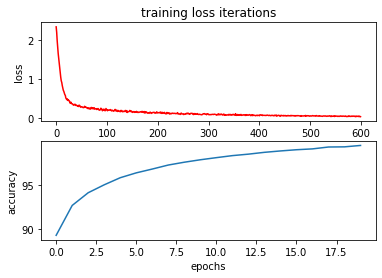

In [13]:
plot_accuracy_loss(training_results)

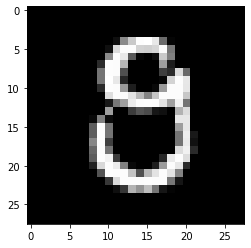

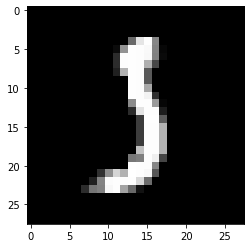

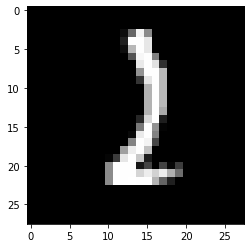

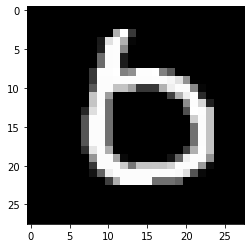

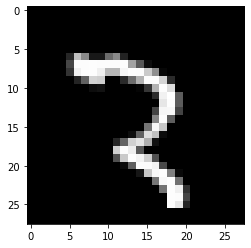

In [14]:
# Plot the first five misclassified samples
trained_model = model.cpu()
count = 0
for x, y in validation_dataset:
    z = trained_model(x.reshape(-1, 28 * 28))
    _,yhat = torch.max(z, 1)
    if yhat != y:
        show_data(x)
        count += 1
    if count >= 5:
        break

10 epoch is done, loss=2.2
20 epoch is done, loss=2.1


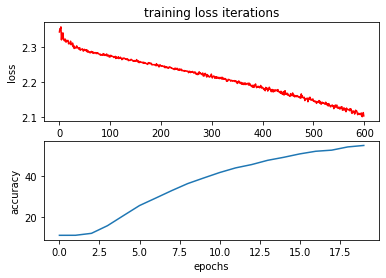

In [15]:
# Use nn.Sequential to build the same model. Use plot_accuracy_loss to print out the accuarcy and loss

model_seq = torch.nn.Sequential(torch.nn.Linear(input_dim, hidden_dim), torch.nn.Sigmoid(), torch.nn.Linear(hidden_dim, output_dim))
learning_rate = 0.01
optimizer = torch.optim.SGD(model_seq.parameters(), lr = learning_rate)
training_results = train(model_seq, criterion, train_loader, validation_loader, optimizer, epochs = 20)
plot_accuracy_loss(training_results)

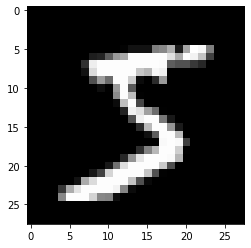

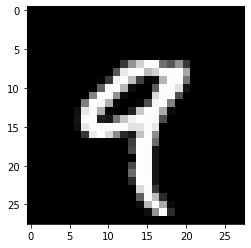

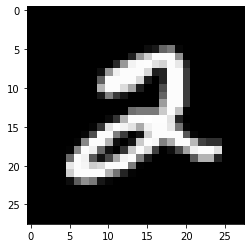

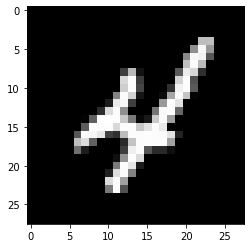

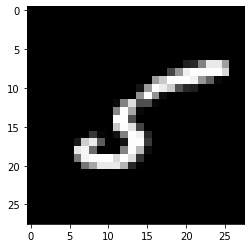

In [16]:
# Plot the first five misclassified samples
trained_model = model_seq.cpu()
count = 0
for x, y in validation_dataset:
    z = trained_model(x.reshape(-1, 28 * 28))
    _,yhat = torch.max(z, 1)
    if yhat != y:
        show_data(x)
        count += 1
    if count >= 5:
        break